<img src="https://miro.medium.com/max/1400/1*MauvaQb4aokes29WJ27OnQ.png">

# SQOOP: ingesta de datos (Puntuación: 50% de la PEC1, todos los ejercicios tienen el mismo valor)

Como ya se ha visto en la parte de teoría el sistema SQOOP es una herramienta fundamental del entorno Big Data de Apache Hadoop. Sqoop nos permite llevar datos de bases de datos relacionales a HDFS, lo que conocemos como ingesta de datos. La ingesta de datos es el primer paso de cualquier proyecto Big Data, ya que antes de empezar a ver cómo almacenar y procesar los datos en los entornos Big Data lo primero que tenemos que hacer es ingestar datos en ellos. En esta práctica exploraremos cómo podemos interactuar desde la linea de comandos con SQOOP. Hemos preparado una Base de datos relacional MySQL con varias tablas, en los siguientes ejercicios interactuaremos con la BBDD, haremos algunas consultas a los datos y por último ingestaremos unos datos en HDFS.

**Para ejecutar los ejercicios de SQOOP no podreis hacerlo desde el notebook, tendreis que hacerlo desde la terminal. Para abrir la terminal podeis hacerlo desde el icono del + arriba a la izquierda y despues en Others -> Terminal. Esta parte de la práctica la entregareis adjuntando capturas de pantalla de los comandos ejecutados y de el resultado de la ejecución en este mismo notebook**

En el siguiente enlace podeis encontrar toda la información sobre los comandos para importar datos con SQOOP: https://sqoop.apache.org/docs/1.4.6/SqoopUserGuide.html#_literal_sqoop_import_literal

Para el bloque de ejericicios de SQOOP necesitareis conocimientos básicos de SQL, existe numerosa documentación online sobre SQL, por ejemplo en este tutorial podreis encontrar todo lo necesario para hacer estos ejercicios: https://www.tutorialspoint.com/sql/index.htm

En primer lugar, una vez esteis en la consola, teneis que acceder a la base de datos MySQL utilizando vuestro usuario y contraseña con el siguiente comando (una vez introduzcais el comando os pedirá que escribais la password que os hemos facilitado):

In [ ]:
mysql -u <USER_NAME> -p

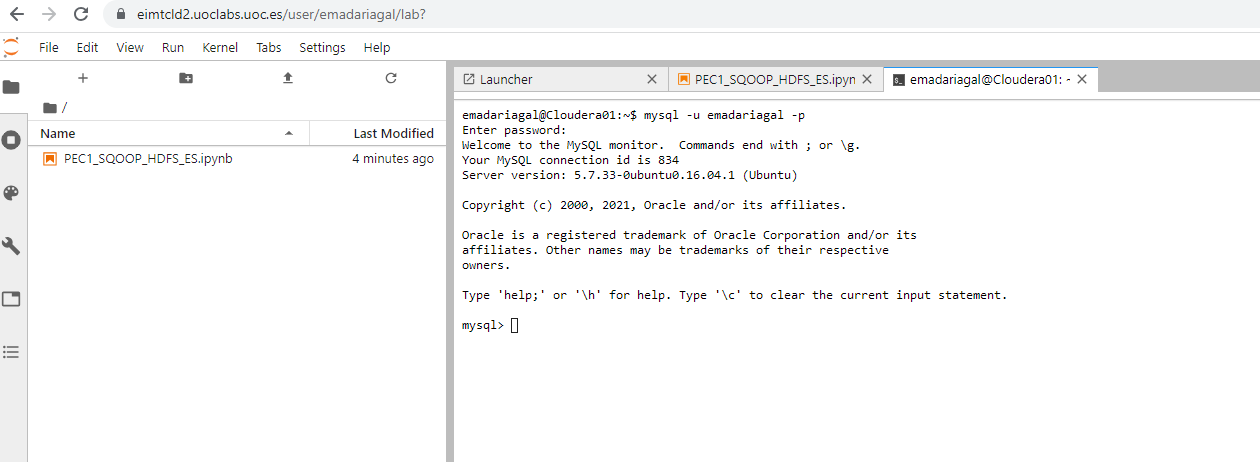

1. Utilizad la BBDD **DWH_RESERVAS** y listad las tablas que existen. La base de datos dispone de 1 tabla de hechos y 4 tablas de dimensiones, explorad las tablas y explicad como se relacionan entre ellas y qué información contienen.

In [ ]:
use DWH_RESERVAS;

El comando **use \<name_database\>** permite acceder a la base de datos por su nombre. La base de datos DWH_RESERVAS contiene una tabla de hechos(h_reserva) y 4 tablas de dimensiones( d_hotel, d_pais, d_regimen y d_tipo_habitacion). Accedemos a dichas tables a través del comando **show tables**.

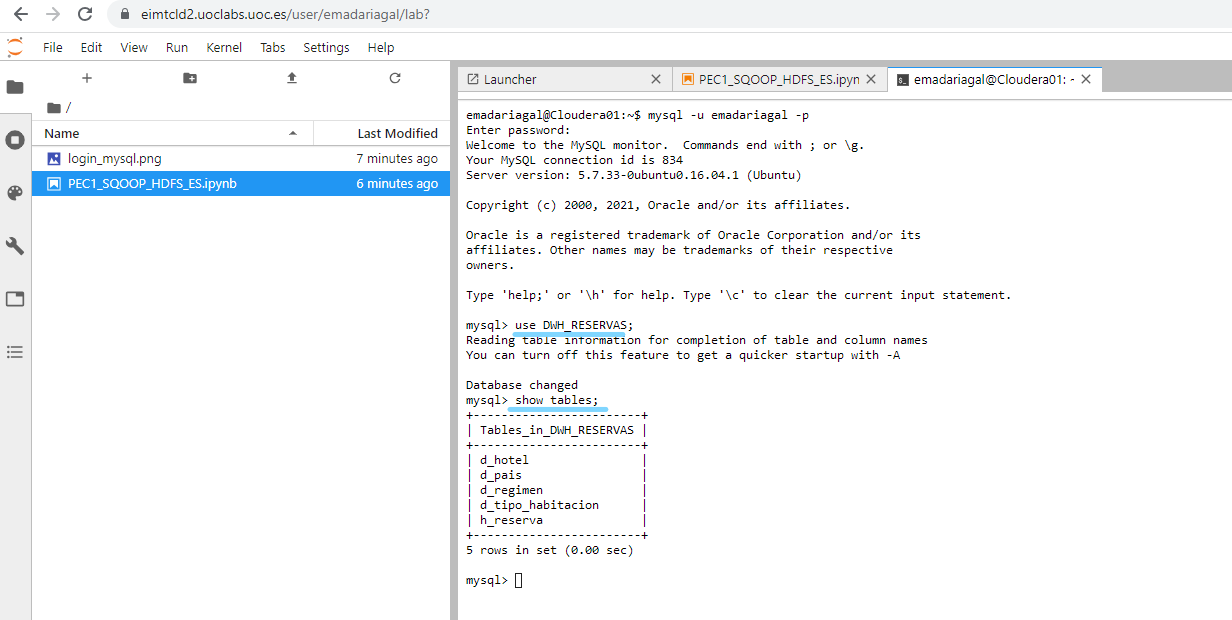

**Explicad en este espacio que tablas componen la BBDD y cómo se relacionan entre ellas**

El comando **describe \<name_table\>** permite acceder a la estructura de una tabla y ver que campos o columnas componen dicha tabla.
En la siguente table observamos que:

- La tabla **d_hotel** esta compuesta por dos campos(id_hotel, desc_hotel). Observamos la columna id_hotel se define como clave primaria de dicha tabla. Una clave primaria permite identificar de forma única cada fila de una tabla, y garantizar que en la columna id_hotel no se repita ningun valor, en otras palabras, evita la duplicacion de valores en dicha columna y permite mantener la integridad refencial en las relaciones entre tablas( mantener la coherencia y consistencias de los datos en la base de datos). 
- La tabla **d_pais** está compuesta por tres campos(id_pais(primary_key), desc_pais, codigo_alpha2).

- La tabla **d_regimen** está compuesta por dos campos(id_regimen(primary_key), desc_regimen).

- La tabla **d_tipo_habitacion** está compuesta por cuatro campos(id_tipo_habitacion(primary_key), desc_tipo_habitacion, capacidad_media, capacidad_maxima).

- La tabla **h_reservas** esta compuesta los siguientes campos: id_reserva como clave primaria de la tabla,  una clave multiple formada por las columnas (id_hotel, id_tipo_habitacion, id_regimen, id_pais) que permite asegurar que ese conjunto formado de 4 valores sean unicos en cada fila de la tabla) y otros campos como: desc_tipo_cliente, desc_canal, fecha_venta, fecha_entrada, fecha_salida, fecha_cancelación, importe, habitaciones, adultos,menores, cunas. La tabla h_reserva contiene 4 claves foráneas o externas (id_hotel, id_tipo_habitacion, id_regimen, id_pais) . Las claves externas e permiten relacionar y crear un vinculo entre dos tablas cuando las columnas de una de ellas hacen referencia a las columnas de la otra que contienen el valor de clave principal. 

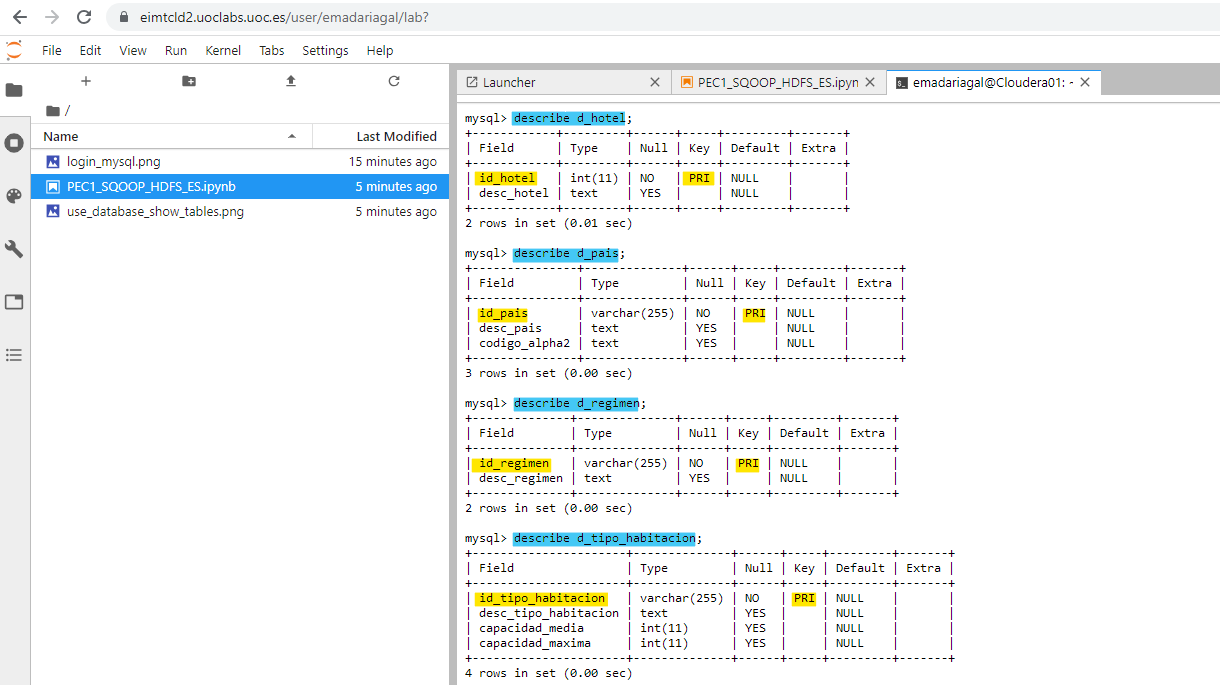

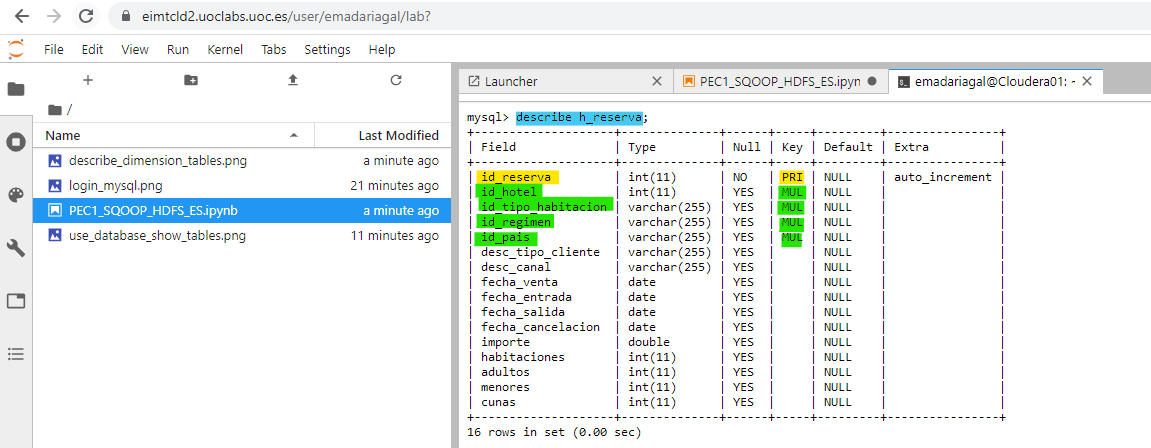

  2. Consultad la tabla **h_reserva** limitando el numero de filas a 10

**Realizad la query en la consola de Mysql y adjuntad una captura de pantalla en este espacio del notebook.**

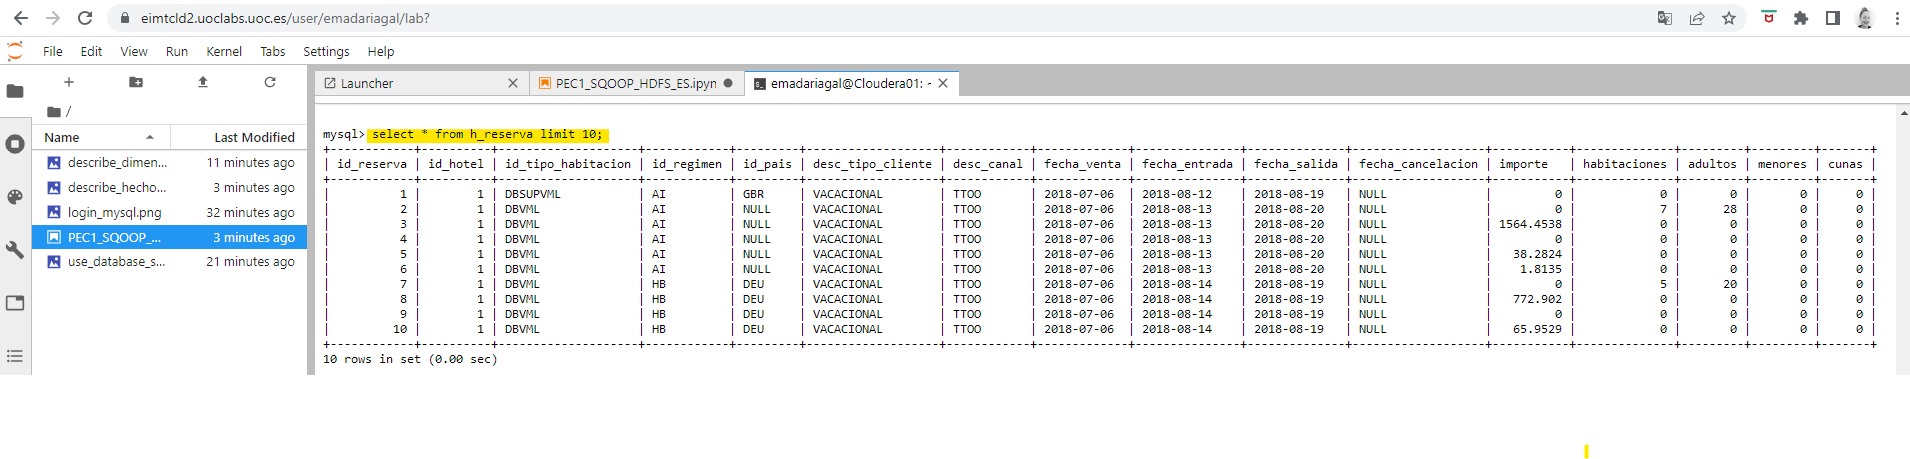

  3. Queremos saber la descripción del tipo de habitaciones más reservadas. Realizad una query que devuelva la descripción de las habitaciones y el numero de veces que ha sido alquilada una habitación de ese tipo.

**Realizad la query en la consola de Mysql y adjuntad una captura de pantalla en este espacio del notebook.**

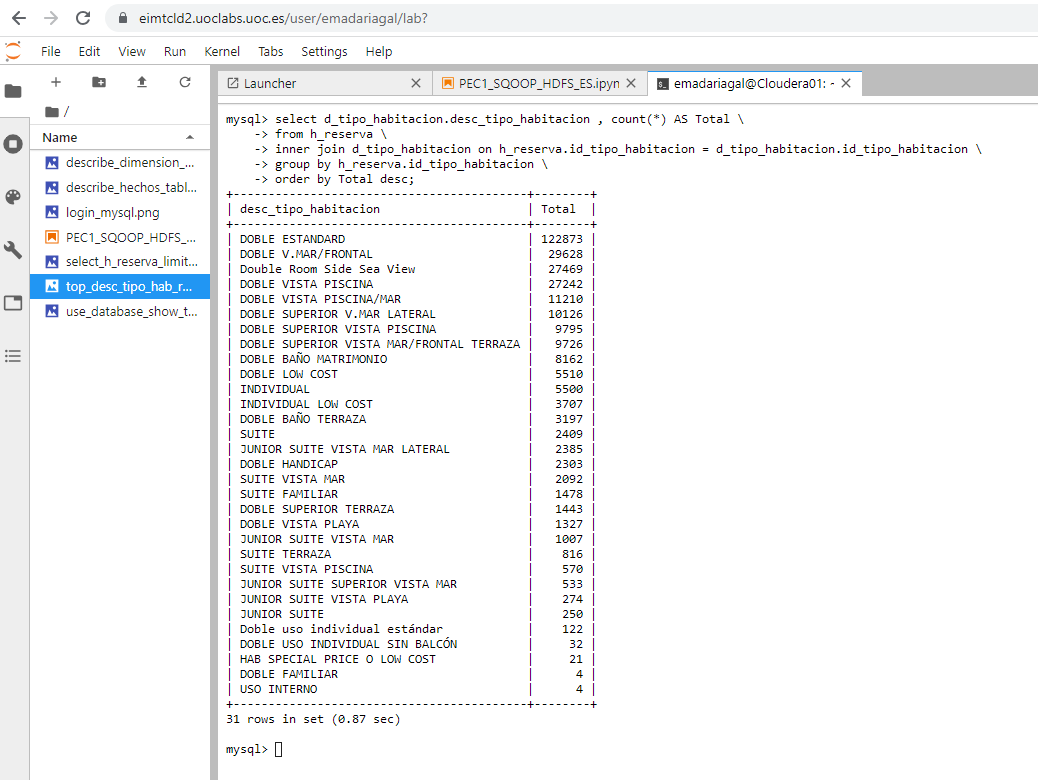

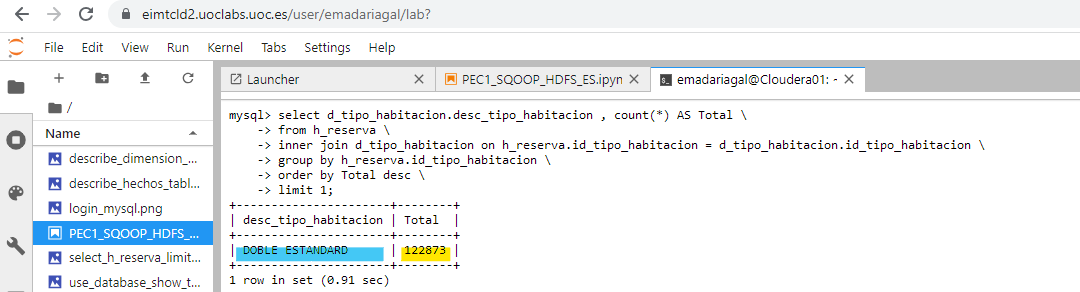

  4. Cread un proceso Sqoop que traspase la información de la tabla de MySQL **d_pais** a la ruta de HDFS /user/ vuestro_user_name /d_pais. Tendreis que completar el comando que se indica a continuación y lanzarlo desde la consola (abrid una nueva consola para tener una ejecución limpia).
  


In [ ]:
sqoop import --connect jdbc:mysql://localhost/DWH_RESERVAS <FILL IN> 

**Realizad la ejecución en una terminal, copiad en la celda anterior el comando y adjuntad una captura de pantalla en este espacio del notebook.**

In [ ]:
 sqoop import --connect jdbc:mysql://localhost/DWH_RESERVAS --username emadariagal  -P --table d_pais -m 1

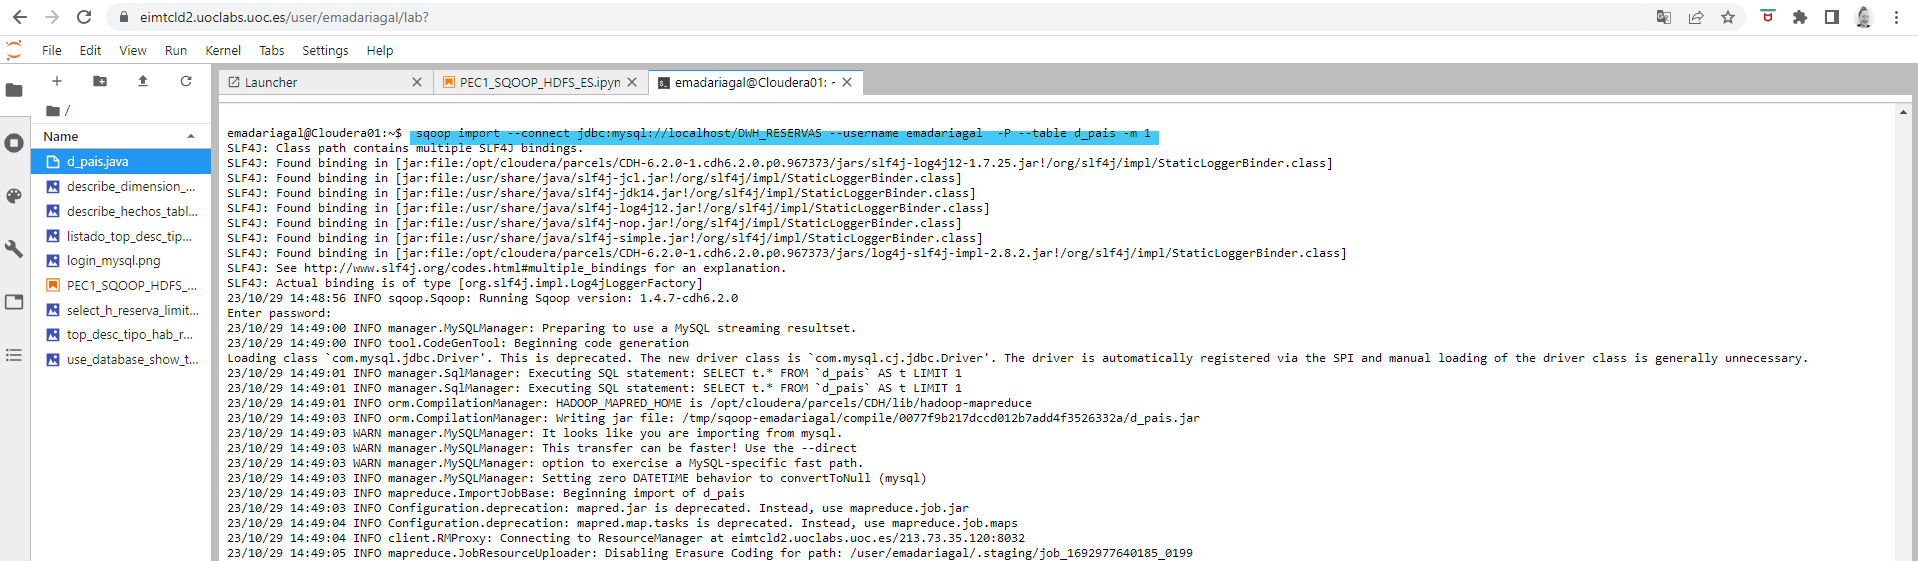

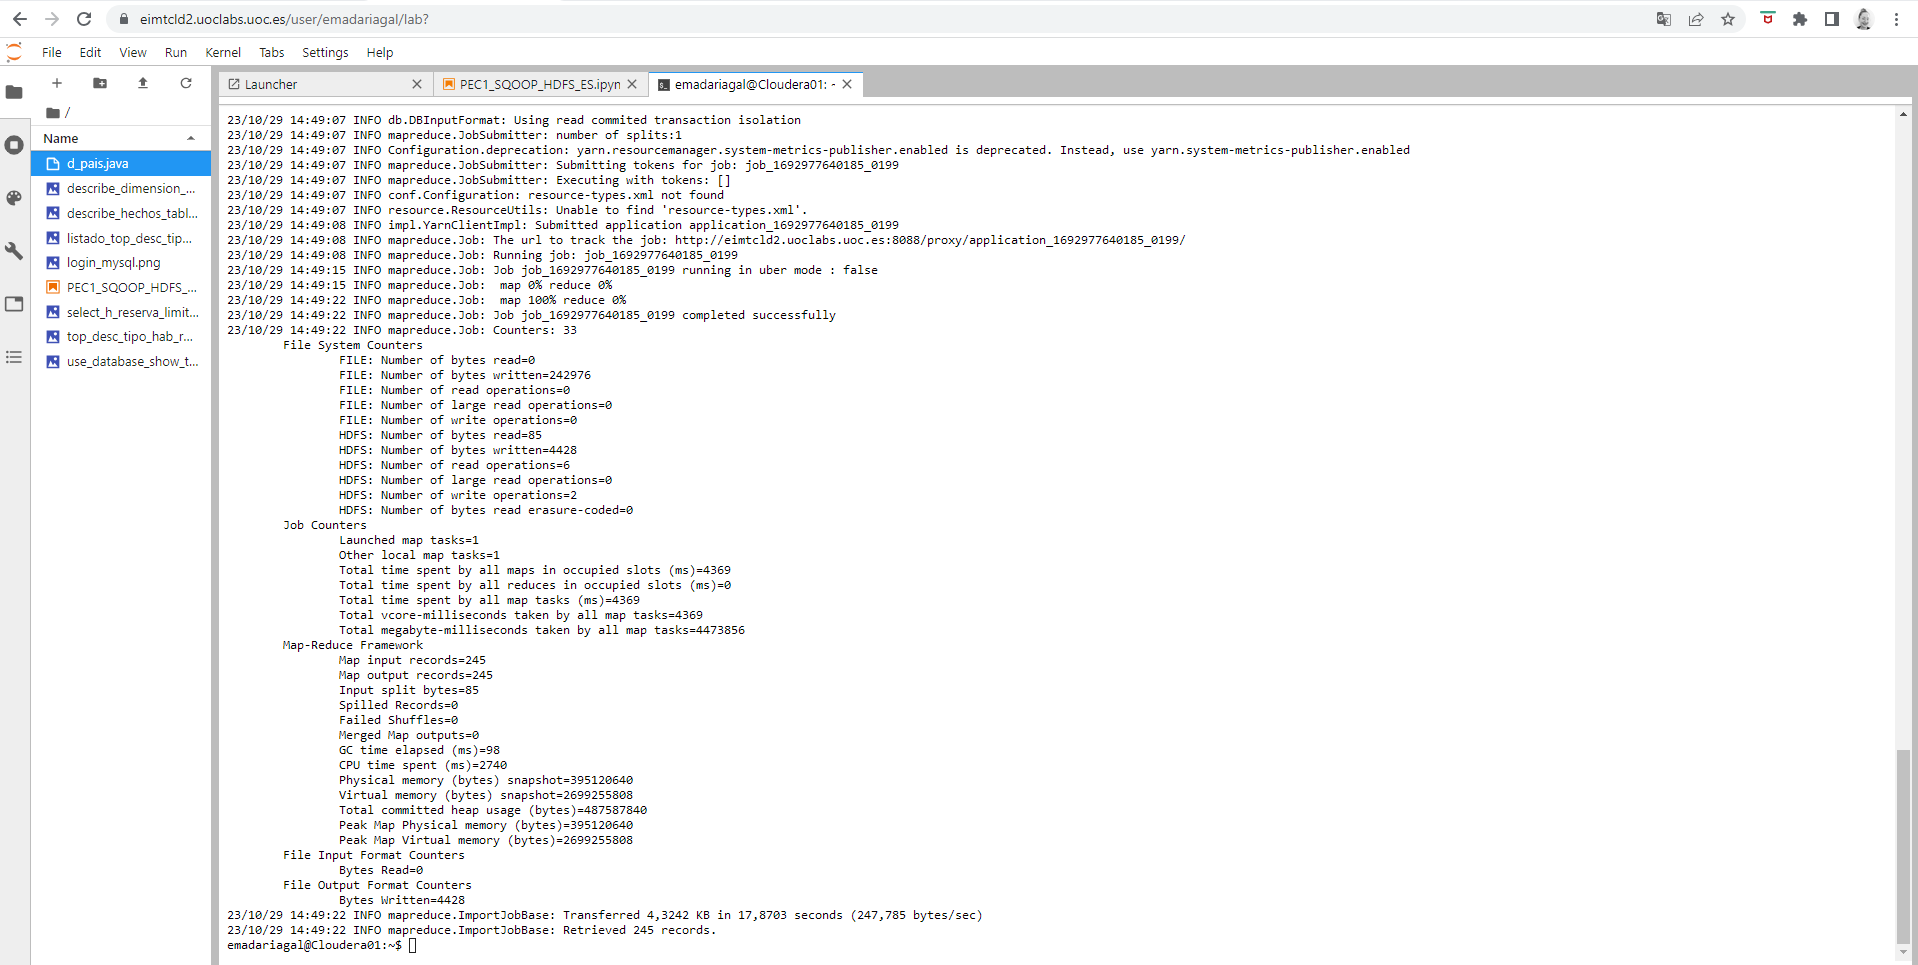

In [1]:
!hdfs dfs -ls

Found 2 items
drwx------   - emadariagal emadariagal          0 2023-10-29 14:49 .staging
drwxr-xr-x   - emadariagal emadariagal          0 2023-10-29 14:49 d_pais


Con Sqoop podemos hacer ingestas totales de una tabla como la que acabamos de hacer en el ejercicio 4, o ingestas parciales, sólo algunos campos o sólo algunas filas utilizando la clausula WHERE.

   5. Cread un proceso Sqoop que traspase la información las columnas **id_tipo_habitacion** y **desc_tipo_habitacion** de la tabla de MySQL **d_tipo_habitacion** a la ruta de HDFS /user/ vuestro_user_name /d_tipo_habitacion.


In [ ]:
sqoop import --connect jdbc:mysql://localhost/DWH_RESERVAS <FILL IN> 

**Realizad la ejecución en una terminal, copiad en la celda anterior el comando y adjuntad una captura de pantalla en este espacio del notebook.**

In [ ]:
sqoop import --connect jdbc:mysql://localhost/DWH_RESERVAS --username emadariagal  -P --table d_tipo_habitacion --columns "id_tipo_habitacion,desc_tipo_habitacion" -m 1

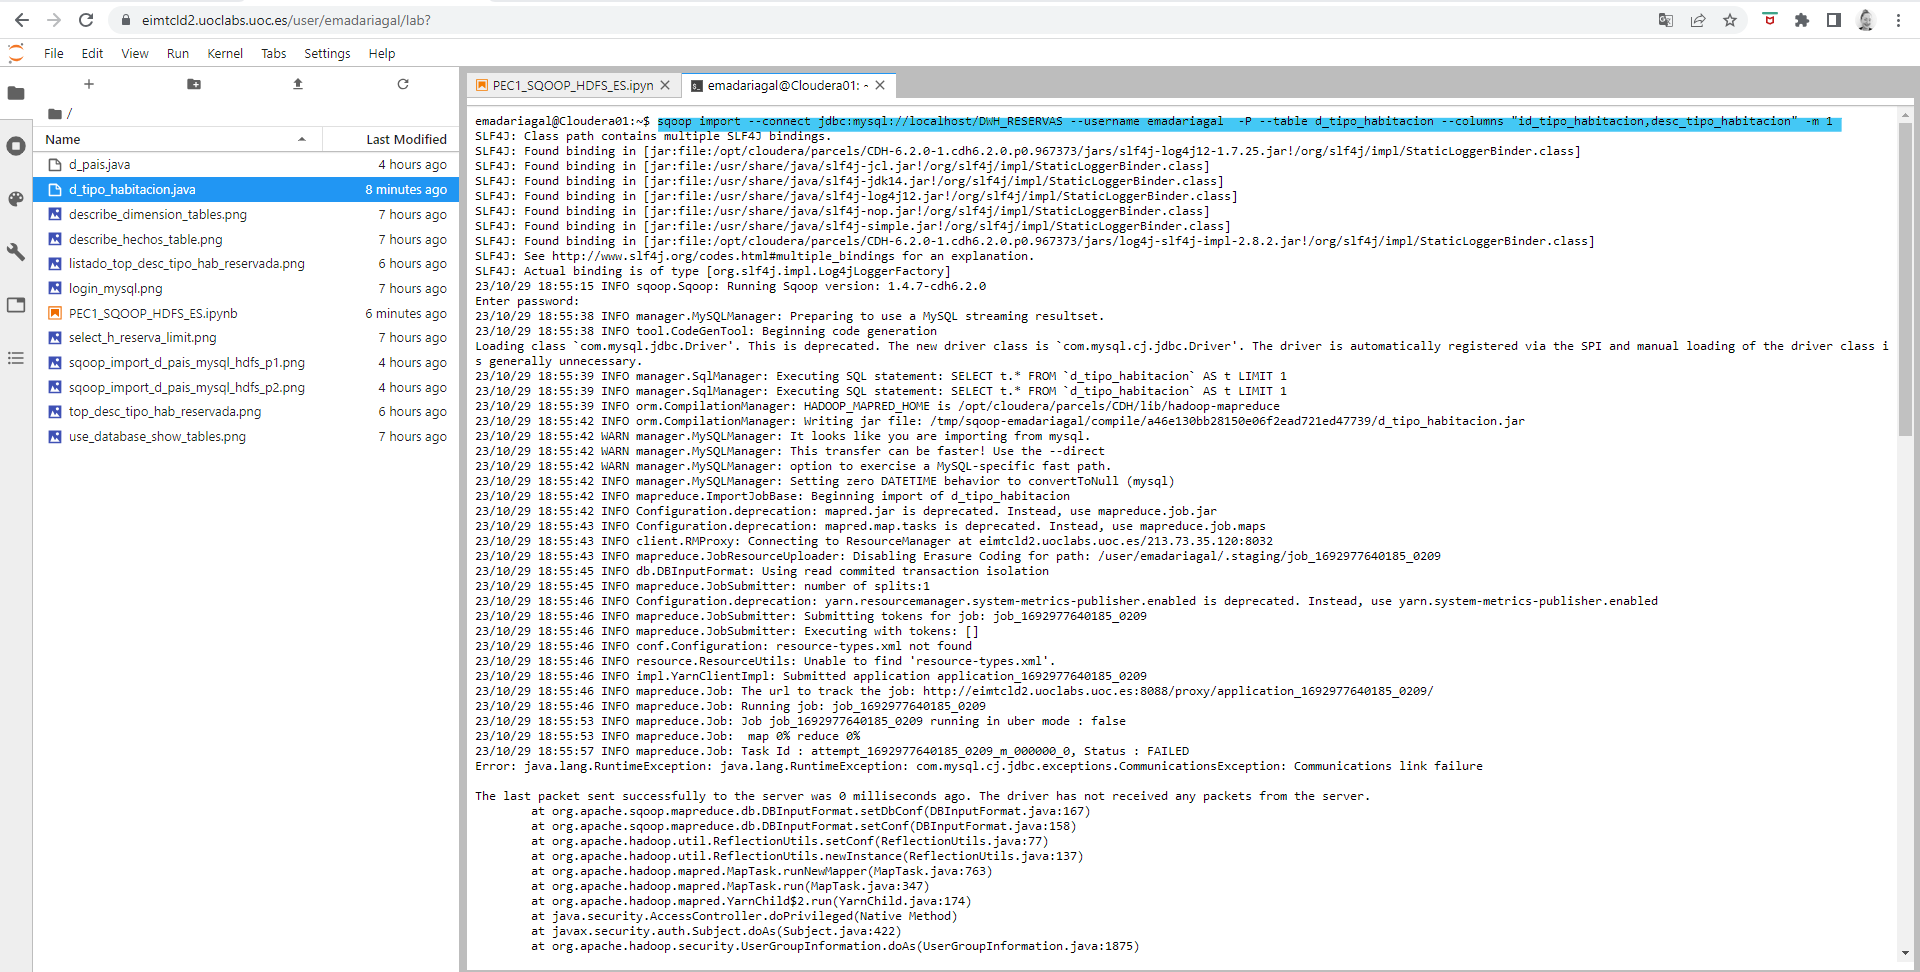

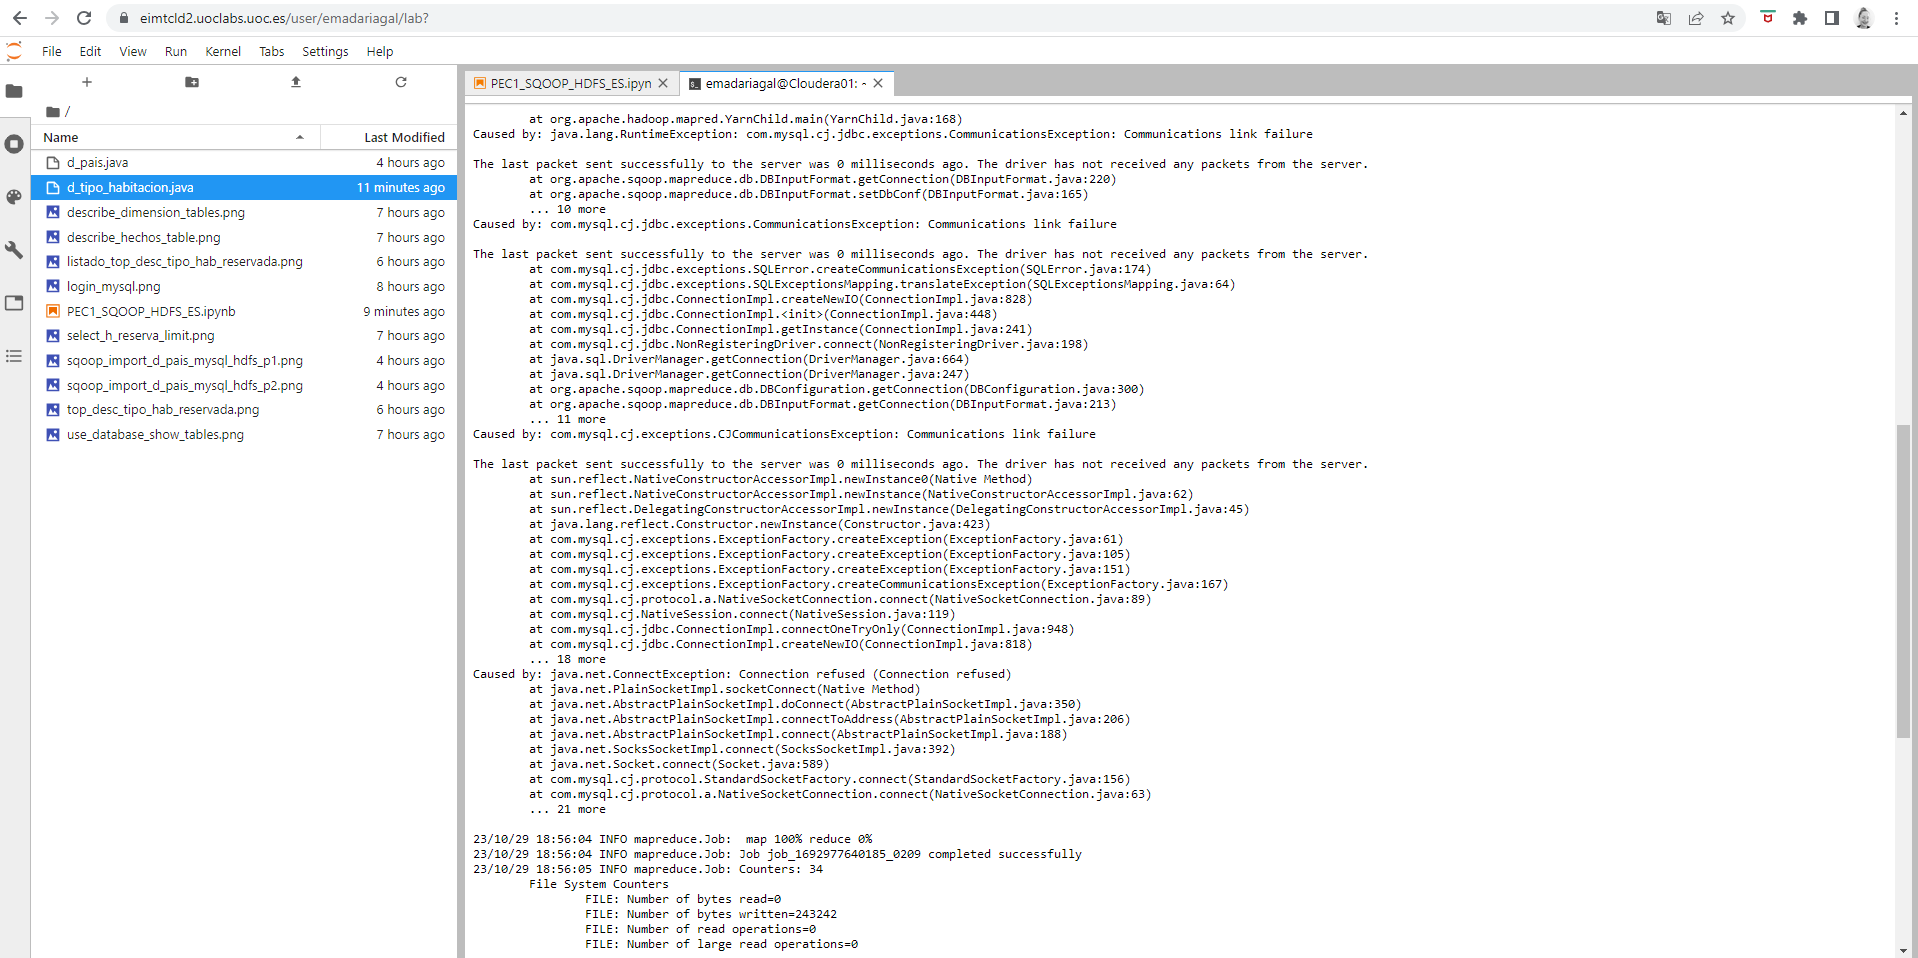

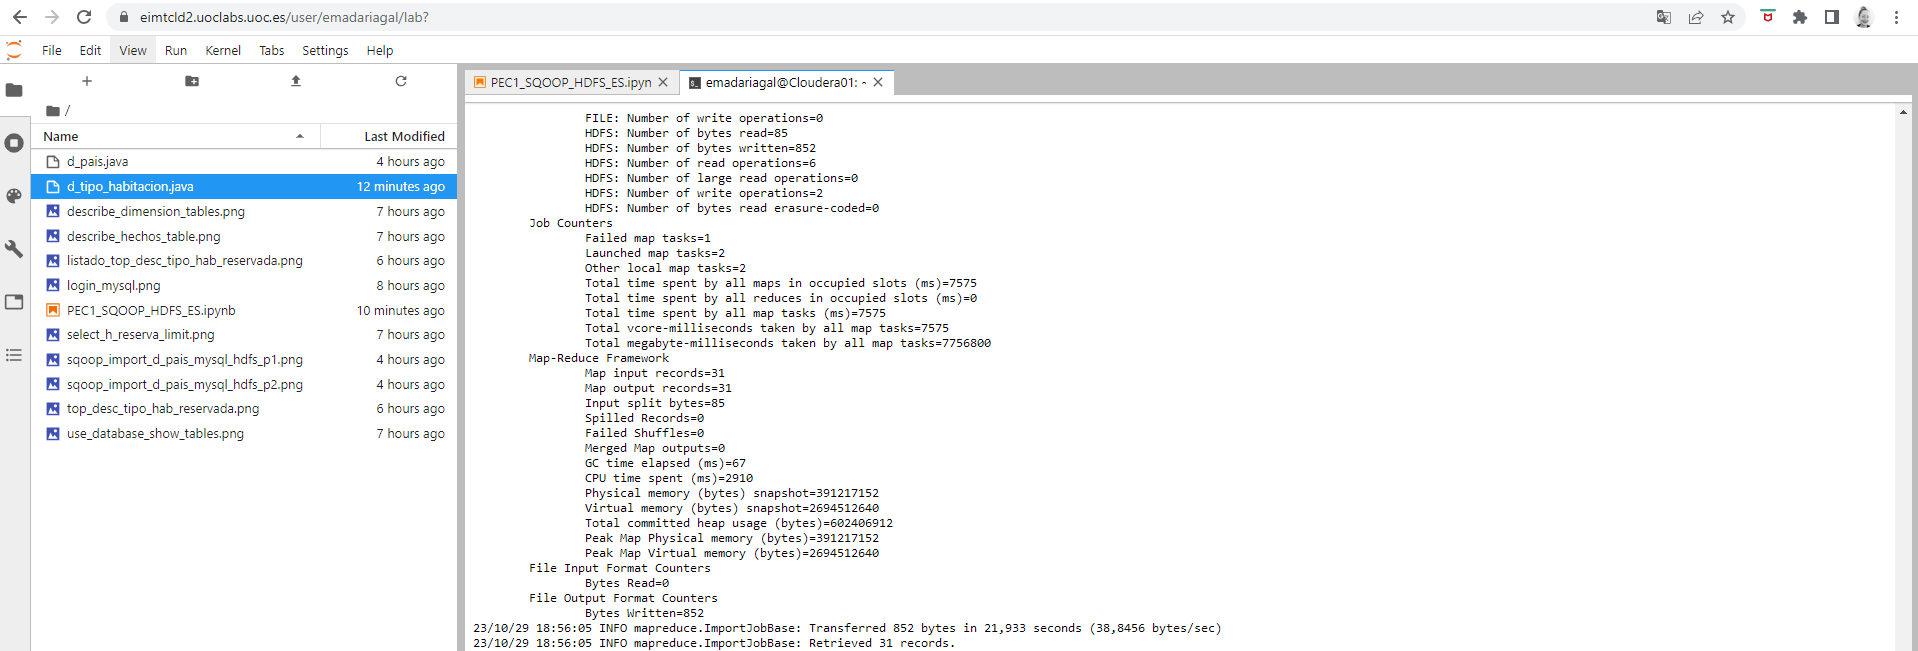

In [1]:
!hdfs dfs -ls

Found 3 items
drwx------   - emadariagal emadariagal          0 2023-10-29 18:56 .staging
drwxr-xr-x   - emadariagal emadariagal          0 2023-10-29 14:49 d_pais
drwxr-xr-x   - emadariagal emadariagal          0 2023-10-29 18:56 d_tipo_habitacion


   6. Cread un proceso Sqoop que traspase la información de la tabla de MySQL **h_reserva** a la ruta de HDFS /user/ vuestro_user_name /h_reserva, pero sólo para los registros que cumplan **que el importe es mayor que 2000**.


In [ ]:
sqoop import --connect jdbc:mysql://localhost/DWH_RESERVAS <FILL IN>

**Realizad la ejecución en una terminal, copiad en la celda anterior el comando y adjuntad una captura de pantalla en este espacio del notebook.**

In [ ]:
sqoop import --connect jdbc:mysql://localhost/DWH_RESERVAS --username emadariagal  -P --table h_reserva --where "importe > 2000" -m 1

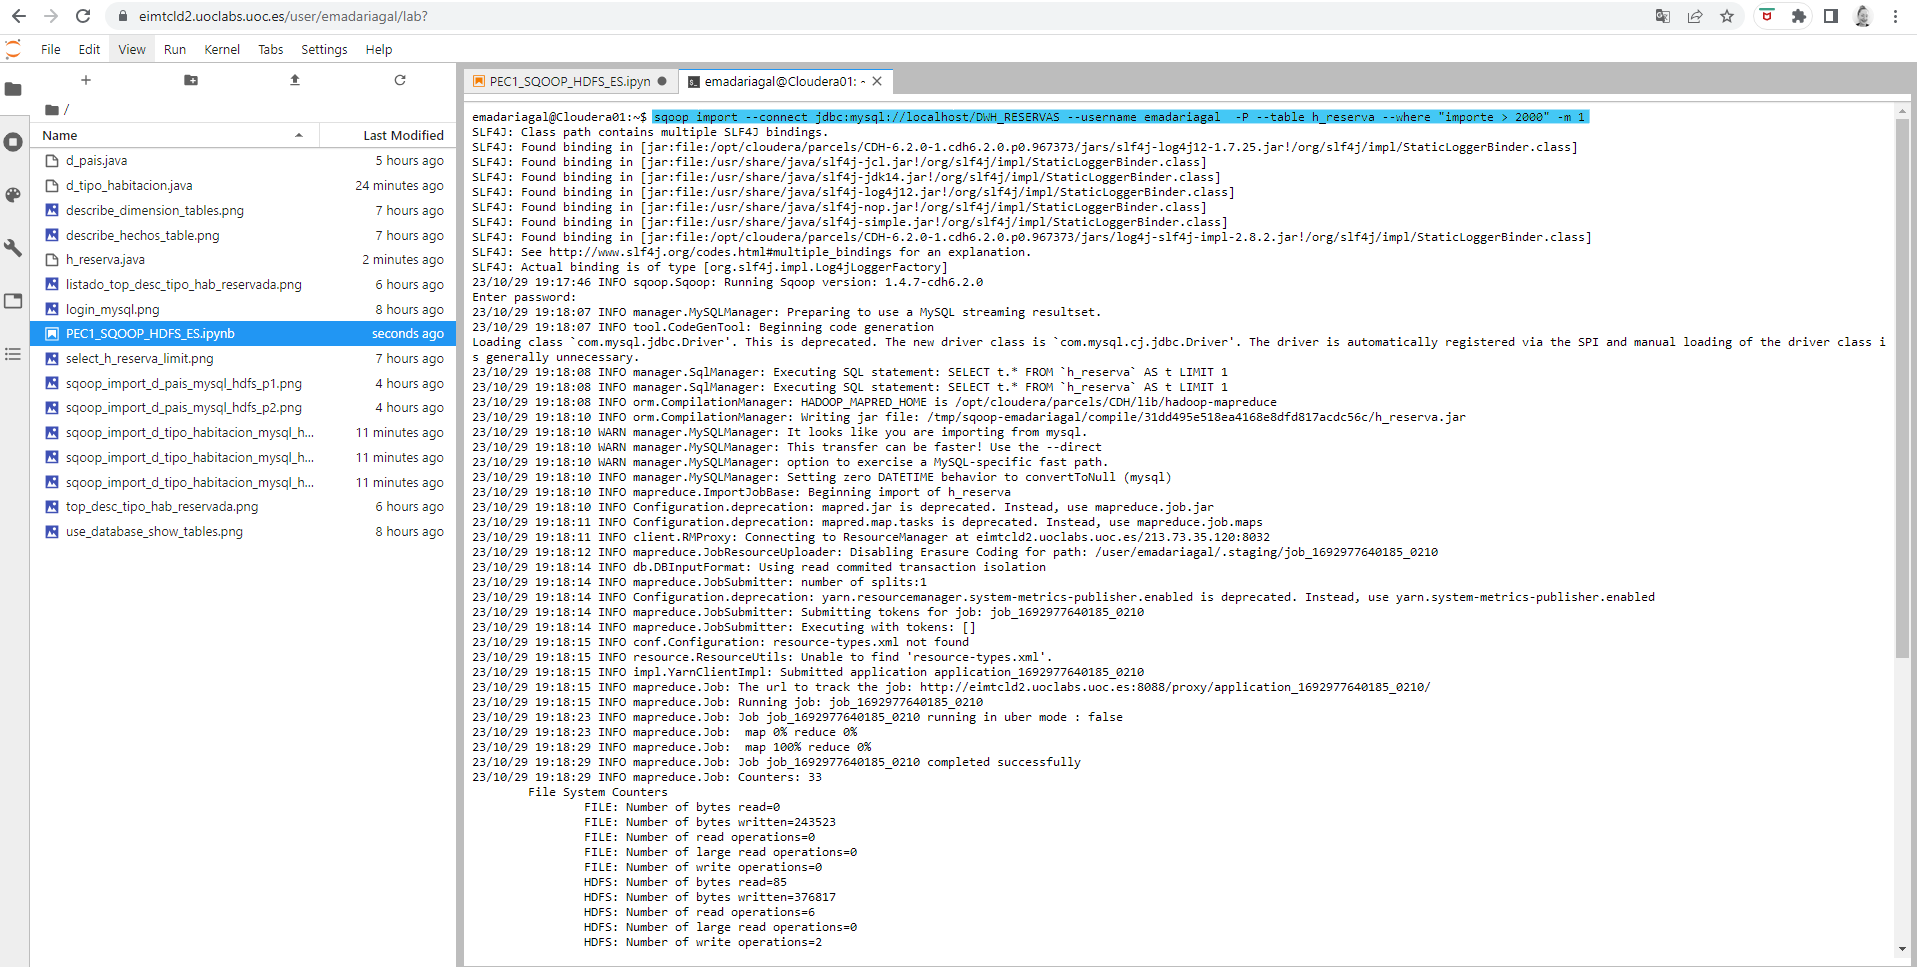

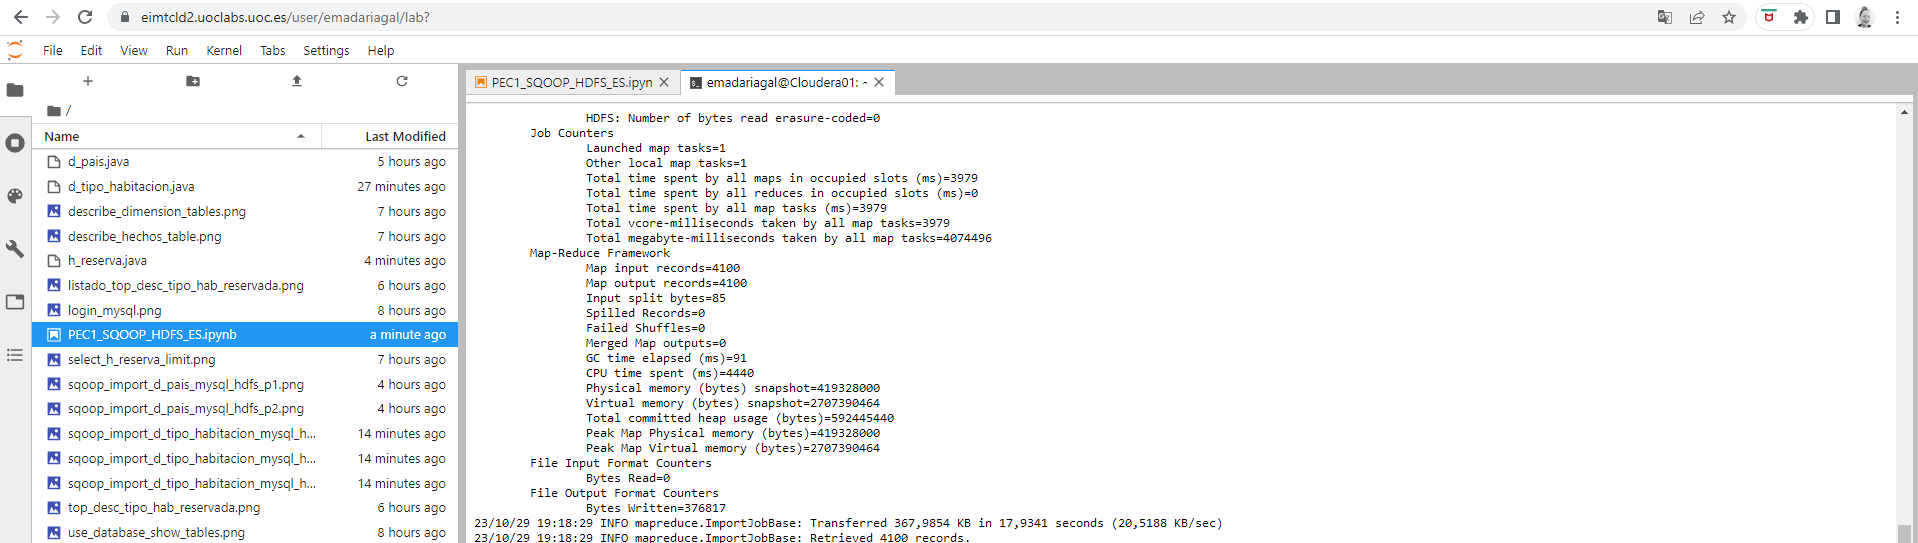

In [2]:
!hdfs dfs -ls

Found 4 items
drwx------   - emadariagal emadariagal          0 2023-10-29 19:18 .staging
drwxr-xr-x   - emadariagal emadariagal          0 2023-10-29 14:49 d_pais
drwxr-xr-x   - emadariagal emadariagal          0 2023-10-29 18:56 d_tipo_habitacion
drwxr-xr-x   - emadariagal emadariagal          0 2023-10-29 19:18 h_reserva


############################################################################### ###############################################################################
 
  
 
<img src="https://hadoop.apache.org/docs/r1.2.1/images/hadoop-logo.jpg">

# Sistema de ficheros HDFS: configuración del entorno de la asignatura (Puntuación: 50% de la PEC1, todos los ejercicios tienen el mismo valor)

Como ya se ha visto en la parte de teoría el sistema de archivos Hadoop (HDFS) es una parte fundamental del entorno Big Data de Apache Hadoop. En esta práctica exploraremos cómo podemos interactuar desde la linea de comandos con el sistema de ficheros HDFS. El primer paso es abrir un terminal desde el JupyterLab. Una vez confeccionada correctamente el pedido mediante la terminal se ruega que ésta sea ejecutada dentro del entorno JupyterLab como enseña a continuación.

Los comandos que se pueden enviar al sistema de archivos son muy similares a las de bash en entornos Linux. En la siguiente referencia oficial se pueden encontrar toda la información relativa a los comandos HDFS https://hadoop.apache.org/docs/current/hadoop-project-dist/hadoop-hdfs/HDFSCommands.html

Los comandos de HDFS que utilizaremos siempre van a empezar por `hdfs dfs` seguimos del comando o comandos que queramos ejecutar, por ejemplo, para listar los archivos del directorio raíz del HDFS utilizaremos el comando *ls*. 

`hdfs dfs -ls /`

In [ ]:
!hdfs dfs -ls /

Found 8 items
drwxr-xr-x   - asolerib   supergroup          0 2020-01-16 22:12 /CFCC
drwxr-xr-x   - asolerib   supergroup          0 2019-10-28 11:09 /aula_B0.485
drwxr-xr-x   - asolerib   supergroup          0 2019-09-25 22:10 /aula_M2.858
drwxr-xr-x   - hbase      hbase               0 2021-09-13 14:41 /hbase
drwxr-xr-x   - aperezgari supergroup          0 2020-05-12 16:49 /home
drwxrwxr-x   - solr       solr                0 2019-07-23 15:49 /solr
drwxrwxrwt   - hdfs       supergroup          0 2021-07-05 15:43 /tmp
drwxrwxr-x   - hdfs       supergroup          0 2021-09-21 15:45 /user


y para listar los ficheros del directorio /user: 

`hdfs dfs -ls /user`

In [ ]:
!hdfs dfs -ls /user

Found 24 items
drwxrwx---   - aalvarez       aalvarez                0 2021-05-23 19:39 /user/aalvarez
drwxrwx---   - asolerib       supergroup              0 2019-08-02 11:42 /user/abhinav9884
drwxrwx---   - acaminalss     acaminalss              0 2021-05-13 15:05 /user/acaminalss
drwxrwx---   - aperezgari     aperezgari              0 2020-06-11 13:29 /user/aperezgari
drwxrwx---   - asolerib       supergroup              0 2021-05-03 17:31 /user/asolerib
drwxrwx---   - cesc           cesc                    0 2020-05-28 16:02 /user/cesc
drwxrwx---   - cesrblesa      cesrblesa               0 2020-10-27 12:27 /user/cesrblesa
drwxrwxr-x   - cloudera       cloudera                0 2019-10-28 22:26 /user/cloudera
drwxrwx---   - egilbl         egilbl                  0 2021-05-13 15:05 /user/egilbl
drwxrwx---   - garguello      garguello               0 2021-09-22 06:37 /user/garguello
drwxrwxrwx   - mapred         hadoop                  0 2019-07-23 15:51 /user/history
drwxrwxr-t   - 

Tal y como se verá a continuación los comandos que HDFS proporciona, permiten: listar, consultar, subir o bajar archivos desde el directorio local en HDFS. Como ya se ha podido ver el aula contiene una serie de directorios donde se proporcionarán y se dejarán los archivos necesarios para la realización de la asignatura. A continuación se pide ejecutar una serie de operaciones que dejarán su directorio hdfs personal configurado para la realización de la asignatura. Puede encontrar el manual de los comandos del sistema HDFS en la parte de "Contenidos y Recursos" de la asignatura.

En primer lugar vamos a empezar inspeccionando los ficheros que hemos ingestando con SQOOP en el ejercicio anterior



1. Listar la carpeta */user/\<loginestudiante\>/d_pais* el directorio HDFS. ¿Qué ficheros aparecen?

In [3]:
!hdfs dfs -ls /user/emadariagal/d_pais

Found 2 items
-rw-r--r--   3 emadariagal emadariagal          0 2023-10-29 14:49 /user/emadariagal/d_pais/_SUCCESS
-rw-r--r--   3 emadariagal emadariagal       4428 2023-10-29 14:49 /user/emadariagal/d_pais/part-m-00000


El archivo _SUCCESS es un archivo que se crea automáticamente cuando la tarea en este caso el traspaso de la tabla d_pais(myslq) a HDSF se ha ejecutado con exito.
El segundo fichero part-m-2000 contiene la informacion traspada o extraida desde mysql a hdfs.

2. Inspeccionar el contenido del fichero */user/\<loginestudiante\>/d_pais/part-m-00000* de HDFS. Utilizad el comando `hdfs dfs -cat` ¿Qué información contiene?

El fichero contiene un conjunto de filas con valores asociadados a los campos de la tabla d_pais , concretamente: id_pais, desc_pais, codigo_alpha2.

In [4]:
!hdfs dfs -cat "/user/emadariagal/d_pais/part-m-00000"

ABW,Aruba,AW
AFG,Afganistán,AF
AGO,Angola,AO
AIA,Anguilla,AI
ALA,Islas Åland,AX
ALB,Albania,AL
AND,Andorra,AD
ANT,Antillas Holandesas,AN
ARE,Emiratos Árabes Unidos,AE
ARG,Argentina,AR
ARM,Armenia,AM
ASM,Samoa Americana,AS
ATA,Antártida,AQ
ATF,Territorios Australes Franceses,TF
ATG,Antigua y Barbuda,AG
AUS,Australia,AU
AUT,Austria,AT
AZE,Azerbaiyán,AZ
BDI,Burundi,BI
BEL,Bélgica,BE
BEN,Benin,BJ
BFA,Burkina Faso,BF
BGD,Bangladesh,BD
BGR,Bulgaria,BG
BHR,Bahréin,BH
BHS,Bahamas,BS
BIH,Bosnia y Herzegovina,BA
BLR,Bielorrusia,BY
BLZ,Belice,BZ
BMU,Bermudas,BM
BOL,Bolivia,BO
BRA,Brasil,BR
BRB,Barbados,BB
BRN,Brunéi,BN
BTN,Bhután,BT
BVT,Isla Bouvet,BV
BWA,Botsuana,BW
CAF,República Centroafricana,CF
CAN,Canadá,CA
CCK,Islas Cocos,CC
CHE,Suiza,CH
CHL,Chile,CL
CHN,China,CN
CIV,Costa de Marfil,CI
CMR,Camerún,CM
COD,República Democrática del Congo,CD
COG,Congo,CG
COK,Islas Cook,CK
COL,Colombia,CO
COM,Comoras,KM
CPV,Cabo Verde,CV
CRI,Costa Rica,CR
CUB,Cuba,CU
CXR,Isla de Navidad,CX
CYM,Islas Caimán,KY
C

3. Crear la carpeta "data" dentro del directorio HDFS */user/\<loginestudiante\>/*

In [6]:
!hdfs dfs -mkdir /user/emadariagal/data

mkdir: `/user/emadariagal/data': File exists


In [8]:
!hdfs dfs -ls /user/emadariagal/

Found 5 items
drwx------   - emadariagal emadariagal          0 2023-10-29 19:18 /user/emadariagal/.staging
drwxr-xr-x   - emadariagal emadariagal          0 2023-10-29 14:49 /user/emadariagal/d_pais
drwxr-xr-x   - emadariagal emadariagal          0 2023-10-29 18:56 /user/emadariagal/d_tipo_habitacion
drwxr-xr-x   - emadariagal emadariagal          0 2023-10-29 19:36 /user/emadariagal/data
drwxr-xr-x   - emadariagal emadariagal          0 2023-10-29 19:18 /user/emadariagal/h_reserva


4. Copiar al directorio "data" que acabais de crear el fichero "/user/\<loginestudiante\>/d_pais/part-m-00000" que hemos inspeccionado anteriormente. Utilitzad el comando `hdfs dfs -cp` para copiar el fichero. 

In [11]:
!hdfs dfs -cp "/user/emadariagal/d_pais/part-m-00000" "/user/emadariagal/data/"

In [13]:
!hdfs dfs -ls data

Found 1 items
-rw-r--r--   3 emadariagal emadariagal       4428 2023-10-29 19:44 data/part-m-00000


5. Copiar las 10 primeras lineas del fichero "LoremIpsum.txt" que se encuentra en el directorio HDFS */aula_M2.858/data/* a un nuevo fichero "LoremIpsum_10.txt" que creareis en el directorio HDFS */user/\<loginestudiante\>/data*. Os seran de utilidad los comandos `hdfs dfs -cat` i `hdfs dfs -put` a parte del comando classico de bash `head`. A continuación utilizad el comando `cat` para comprobar que se ha realizado la acción correctamente

In [14]:
!hdfs dfs -ls /aula_M2.858/data/  # lista ruta del fichero a copiar

Found 4 items
-rw-r--r--   3 asole asole          318264 2019-08-16 13:52 /aula_M2.858/data/Folds5x2_pp.csv
-rw-r--r--   3 asole asole       203431368 2019-08-16 12:10 /aula_M2.858/data/LoremIpsum.txt
drwxr-xr-x   - asole asole               0 2019-10-20 22:31 /aula_M2.858/data/pec2
drwxr-xr-x   - joant supergroup          0 2019-11-04 19:45 /aula_M2.858/data/tweets28a_sample.json


In [22]:
!hdfs dfs -cat /aula_M2.858/data/LoremIpsum.txt | head -n 10 # visualizar  las 10 primeras lineas

Aut minima deleniti et autem minus illo esse. Dolores eligendi corrupti dolore minima. Nostrum eos nobis nam nihil aspernatur nam. Ut quae sint laborum ut dolores. Error possimus aperiam consequatur.

Pariatur sed quo non itaque qui pariatur saepe ad. Quis consequatur nihil iste molestias et eos ut. Expedita vel reiciendis dolorem. Enim doloribus quam architecto aperiam.

Sed repudiandae pariatur similique est aut. Sequi animi in aperiam enim ipsa. Enim dolorem inventore aut quo odio in consequatur et.

Aspernatur ad esse et aliquid itaque. Dolores rerum quia commodi explicabo non magnam. Nostrum consectetur non sint eum nulla et aut quis. Doloribus itaque nulla molestiae quis est est quo. Facilis incidunt a ipsa in itaque sed aut nobis. Facere dignissimos atque unde cum ea vero.

Tenetur vel quod voluptatum laudantium dolores neque. Aut est modi qui aperiam itaque aperiam quae. Ratione doloremque aut delectus quas qui.

cat: Unable to write to output stream.


In [28]:
!hdfs dfs -cat /aula_M2.858/data/LoremIpsum.txt | head -n 10 >LoremIpsum_10.txt

cat: Unable to write to output stream.


In [29]:
!hdfs dfs -put LoremIpsum_10.txt /user/emadariagal/data

In [30]:
!hdfs dfs -ls data # Listar directorio para comprobar que se ha subido el fichero a la ruta destino.

Found 2 items
-rw-r--r--   3 emadariagal emadariagal        935 2023-10-29 20:13 data/LoremIpsum_10.txt
-rw-r--r--   3 emadariagal emadariagal       4428 2023-10-29 19:44 data/part-m-00000


In [31]:
!hdfs dfs -cat data/LoremIpsum_10.txt # Visualizamos que contenido del nuevo fichero contiene lo esperado. 

Aut minima deleniti et autem minus illo esse. Dolores eligendi corrupti dolore minima. Nostrum eos nobis nam nihil aspernatur nam. Ut quae sint laborum ut dolores. Error possimus aperiam consequatur.

Pariatur sed quo non itaque qui pariatur saepe ad. Quis consequatur nihil iste molestias et eos ut. Expedita vel reiciendis dolorem. Enim doloribus quam architecto aperiam.

Sed repudiandae pariatur similique est aut. Sequi animi in aperiam enim ipsa. Enim dolorem inventore aut quo odio in consequatur et.

Aspernatur ad esse et aliquid itaque. Dolores rerum quia commodi explicabo non magnam. Nostrum consectetur non sint eum nulla et aut quis. Doloribus itaque nulla molestiae quis est est quo. Facilis incidunt a ipsa in itaque sed aut nobis. Facere dignissimos atque unde cum ea vero.

Tenetur vel quod voluptatum laudantium dolores neque. Aut est modi qui aperiam itaque aperiam quae. Ratione doloremque aut delectus quas qui.



6. Descargar el fichero que acabais de crear */user/\<loginestudiante\>/data/LoremIpsum_10.txt* . Utilizar el comando `hdfs dfs -get`

In [32]:
!hdfs dfs -get /user/emadariagal/data/LoremIpsum_10.txt 

get: `LoremIpsum_10.txt': File exists


A parte de los comandos que ya habéis visto orientados a que cada usuario pueda gestionar el sistema de fitxeros HDFS, también es posible explorar la organización interna de los diferentes fitxeros existentes en los directorios HDFS.

7. Se pide que mediante el comando `hdfs fsck` se determine i describa como esta estructurado el fichero */user/\<loginestudiante\>/data/LoremIpsum_10.txt* dentro del sistema HDFS. En concreto se pide mostrar como está subdividido en bloques, en que nodo están los bloques y si estos estéan replicados. Podeis consultar està información en la web oficial de referéncia.

In [33]:
!hdfs fsck /user/emadariagal/data/LoremIpsum_10.txt 

Connecting to namenode via http://eimtcld2.uoclabs.uoc.es:9870/fsck?ugi=emadariagal&path=%2Fuser%2Femadariagal%2Fdata%2FLoremIpsum_10.txt
FSCK started by emadariagal (auth:SIMPLE) from /213.73.35.120 for path /user/emadariagal/data/LoremIpsum_10.txt at Sun Oct 29 20:20:41 CET 2023

Status: HEALTHY
 Number of data-nodes:	3
 Number of racks:		1
 Total dirs:			0
 Total symlinks:		0

Replicated Blocks:
 Total size:	935 B
 Total files:	1
 Total blocks (validated):	1 (avg. block size 935 B)
 Minimally replicated blocks:	1 (100.0 %)
 Over-replicated blocks:	0 (0.0 %)
 Under-replicated blocks:	0 (0.0 %)
 Mis-replicated blocks:		0 (0.0 %)
 Default replication factor:	3
 Average block replication:	3.0
 Missing blocks:		0
 Corrupt blocks:		0
 Missing replicas:		0 (0.0 %)
 Blocks queued for replication:	0

Erasure Coded Block Groups:
 Total size:	0 B
 Total files:	0
 Total block groups (validated):	0
 Minimally erasure-coded block groups:	0
 Over-erasure-coded block groups:	0
 Under-erasure-coded 

In [38]:
!hdfs fsck /user/emadariagal/data/LoremIpsum_10.txt -blocks -locations 

Connecting to namenode via http://eimtcld2.uoclabs.uoc.es:9870/fsck?ugi=emadariagal&blocks=1&locations=1&path=%2Fuser%2Femadariagal%2Fdata%2FLoremIpsum_10.txt
FSCK started by emadariagal (auth:SIMPLE) from /213.73.35.120 for path /user/emadariagal/data/LoremIpsum_10.txt at Sun Oct 29 20:32:48 CET 2023

Status: HEALTHY
 Number of data-nodes:	3
 Number of racks:		1
 Total dirs:			0
 Total symlinks:		0

Replicated Blocks:
 Total size:	935 B
 Total files:	1
 Total blocks (validated):	1 (avg. block size 935 B)
 Minimally replicated blocks:	1 (100.0 %)
 Over-replicated blocks:	0 (0.0 %)
 Under-replicated blocks:	0 (0.0 %)
 Mis-replicated blocks:		0 (0.0 %)
 Default replication factor:	3
 Average block replication:	3.0
 Missing blocks:		0
 Corrupt blocks:		0
 Missing replicas:		0 (0.0 %)
 Blocks queued for replication:	0

Erasure Coded Block Groups:
 Total size:	0 B
 Total files:	0
 Total block groups (validated):	0
 Minimally erasure-coded block groups:	0
 Over-erasure-coded block groups:	0


Respuesta:

- Sí los datos estan replicados. Numero de replicas = 3
- La ubicacion de los nodos está en un rack /213.73.35.120 
- Se ha replicado un solo fichero.
- Factor de replicacion por defecto son 3.
- El fichero se ha dividido en un solo bloque. El bloque tiene un tamaño de 935B.

8. Como sabeis los diferentes ficheros HDFS están particionados en bloques. Podeis consultar la configuración mediante el comando: `hdfs getconf -confKey dfs.blocksize`. Quantos MB hay por bloque?

In [39]:
!hdfs getconf -confKey dfs.blocksize # permite obtener el tamaño del bloque en bytes

134217728


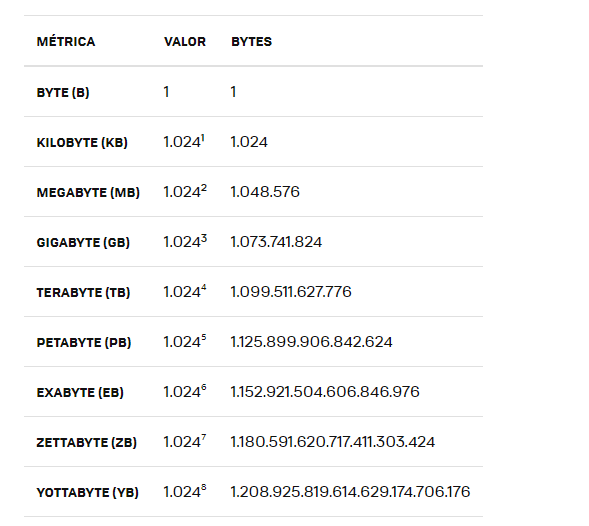

In [17]:
# 1 Kilobyte (KB) = 1.024 bytes y  1 Megabyte (MB) = 1.024 KB
size = 134217728  / (1024**2)
print("134217728 bytes equivale a {} MB por bloque.".format(size))

134217728 bytes equivale a 128.0 MB por bloque.


9. ¿Si un fichero tuviera un tamaño de 340MB y lo almacenaramos en nuestro sistema HDFS, cuantos bloques se habrían generado (sin contar réplicas) y de qué tamaño cada una?


In [21]:
#Escriba aqui la respuesta
# Si el tamaño por defecto del bloque es de 128 MB.

bloques_sin_rep = 340 / 128
print("El número de bloques sin contar las replicas es de {}".format(round(bloques_sin_rep)))

El número de bloques sin contar las replicas es de 3


10. ¿Qué es la tolerancia a fallos y cómo se consigue en HDFS?

Un sistema tolerante a fallos es el sistema de ficheros distribuido Hadoop File System (HDFS). Los datos (en forma de fichero) se almacenan en bloques de tamaño configurable
distribuidos entre los nodos que componen el clúster, los llamados DataNodes. Además, cada bloque individual se replica en nodos distintos, de modo que un fichero se puede
reconstruir de diferentes maneras según que DataNodes estén operativos. La información relativa a cada fichero y sus bloques asociados la gestiona el NameNode, un servicio que
corre en un nodo maestro. Dicho servicio también está replicado (Secondary NameNode).Por tanto, si un nodo cualquiera cae, el NameNode será capaz de reconstruir el fichero
a partir de las réplicas de sus bloques. En definitiva, la tolerancia a fallos es la capacidad que tiene un sistema para continuar funcionando frente a errores o fallos inseperados. 

11. Se pide explorar la estructura del sistema HDFS mediante su WebUI. Para ello primeramente debemos creare un túnel ssh que nos dé acceso al puerto 9870 (sobre el que está corriendo la Web UI de HDFS). A los alumnos que tengáis un sistema basado en Linux, podéis hacerlo de manera muy simple mediante el siguiente comando:

```python
ssh -p55000  -L 9870:eimtcld.uoc.edu:9870 <login>@eimtcld.uoc.edu
       
```
Una vez ejecutado el comando y logeado correctamente podéis acceder a la Web UI de HDFS en la dirección:

```Python
http://localhost:9870/dfshealth.html#tab-overview
```

> Nota: a los alumnos que solo dispongan de un sistema Windows, adjuntamos una pequeña descripción para crear el túnel ssh mediante la aplicación Putty.

Esta pregunta es de texto libre y se pide que se describa a continuación qué información podéis obtener explorando la Web UI, número de DataNodes, localización de estos y su estado, factores de replicación, errores si los hay, etc.

Esta url nos permite visualizar un cuadro de mandos donde poder chequear el estado de nuestro sistema de ficheros distribuidos de Hadoop.  Podemos ver distintas secciones como:
Una descripcion general  de donde se encuenta levantado el hdfs , su configuracion base( memoria, archivos, directorios, bloques, el estado del diario NameNode, el directorio de almacenamiento del NameNode, y el tipo de almacenamiento dfs. Adjunto una captura de esta primera sección.

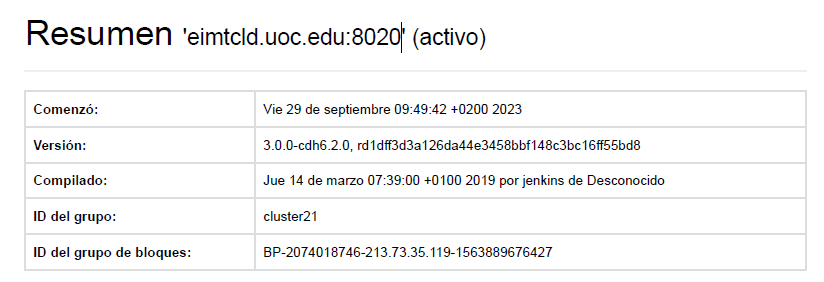

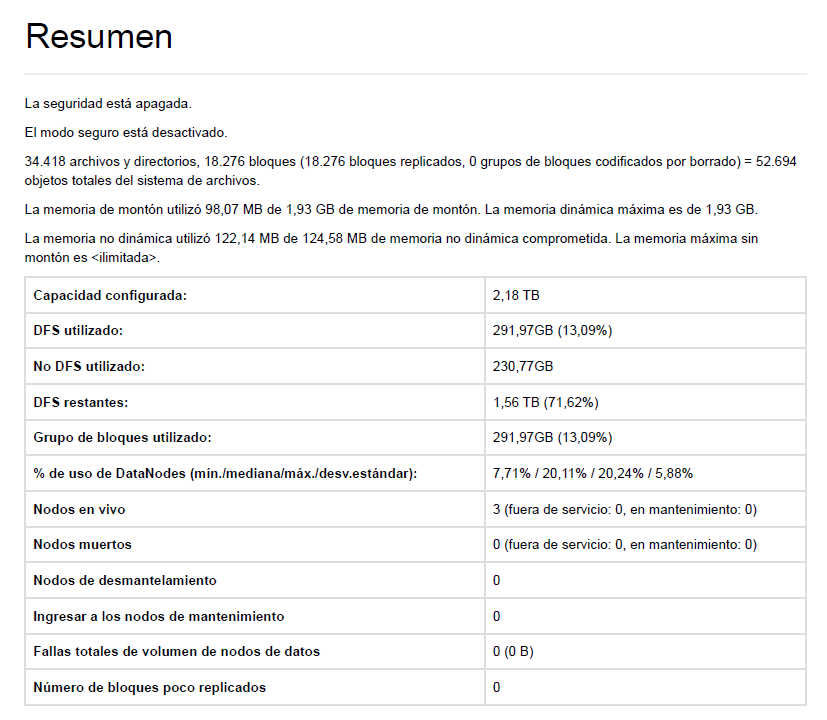

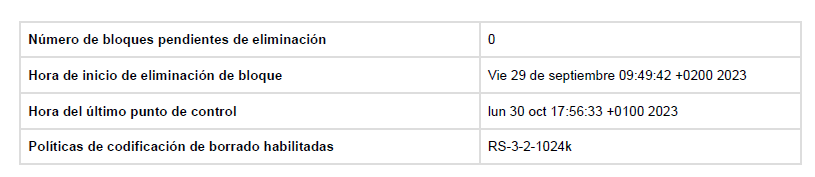

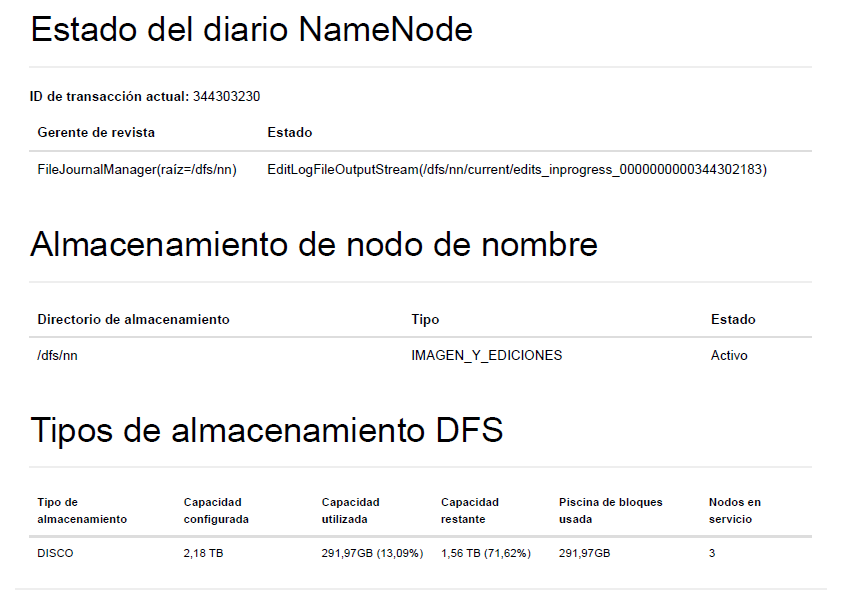

En la pestaña Nodos de datos podemos visualizar cuantos DataNodes hay, nombre de datanode, dirección ip y el puerto, la capacidad de memoria de cada datanode, el tamaño de memoria en bytes de cada bloque.

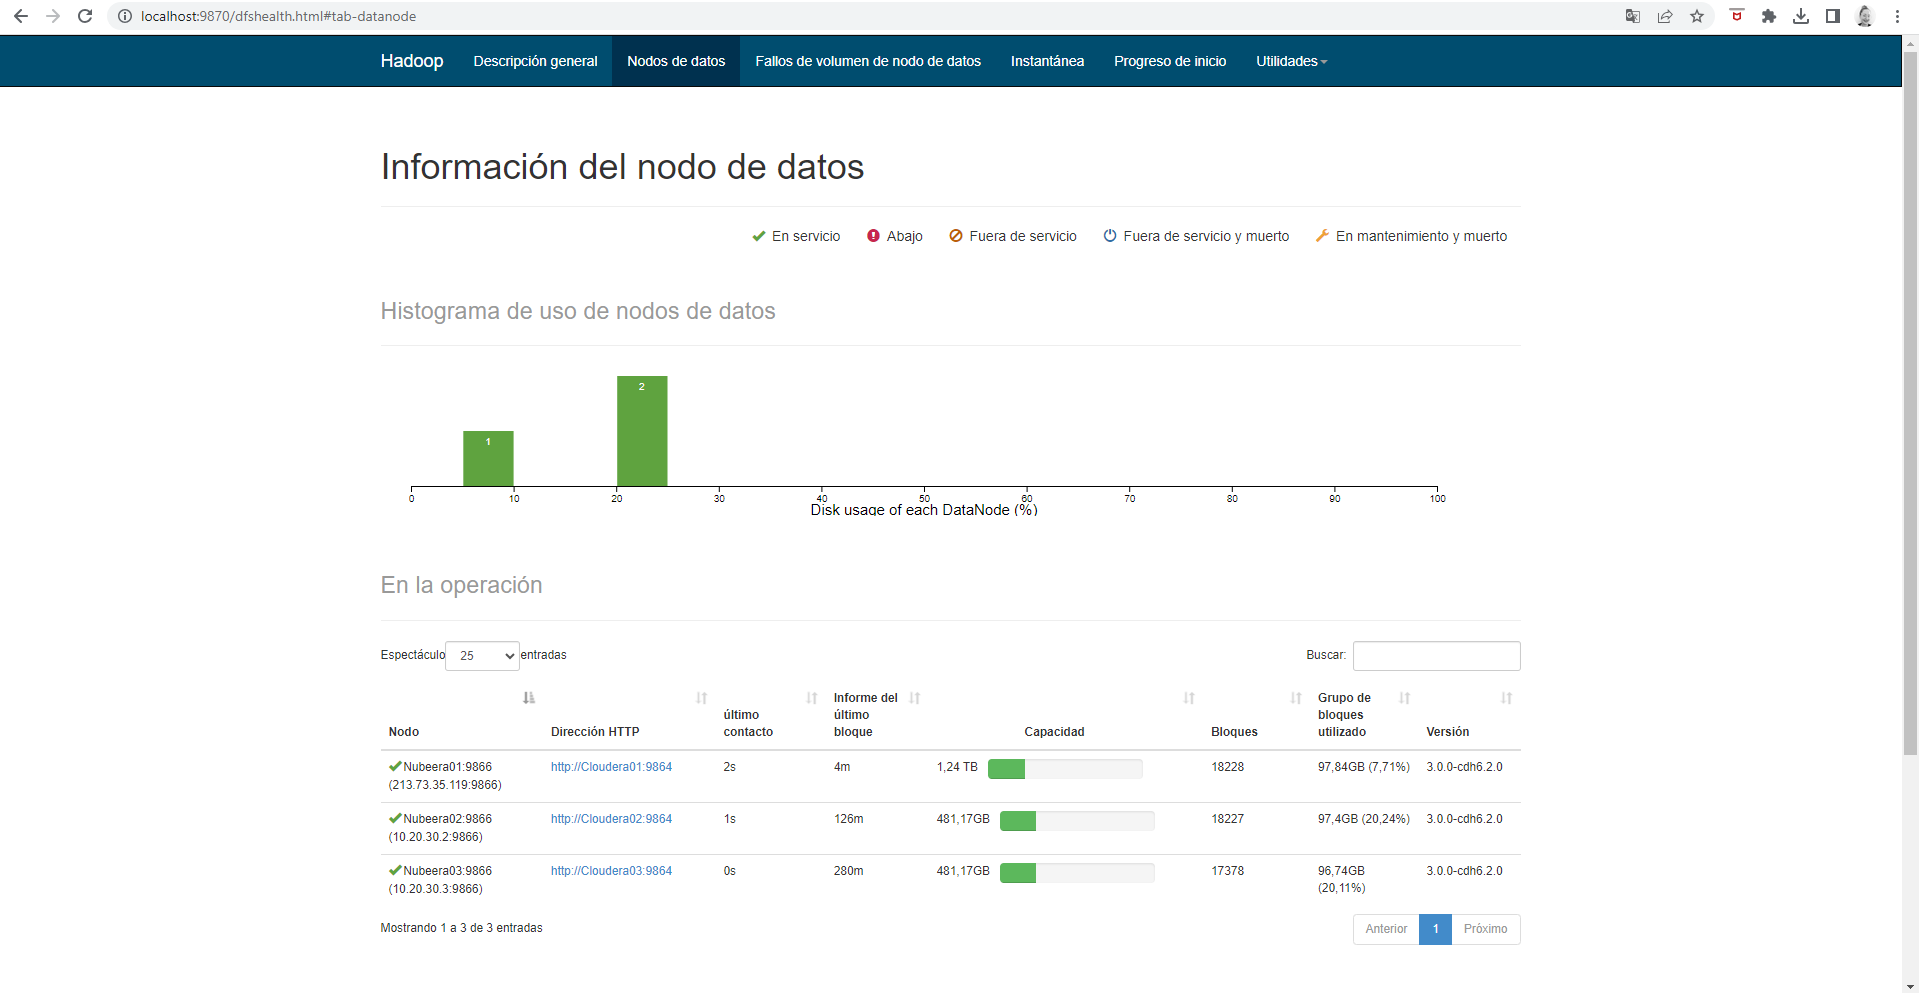

In [ ]:
También podemos acceder a otras secciones como DataNode Volumen Failures, donde se repotarian los posibles fallos generados en alguno de los nodos.

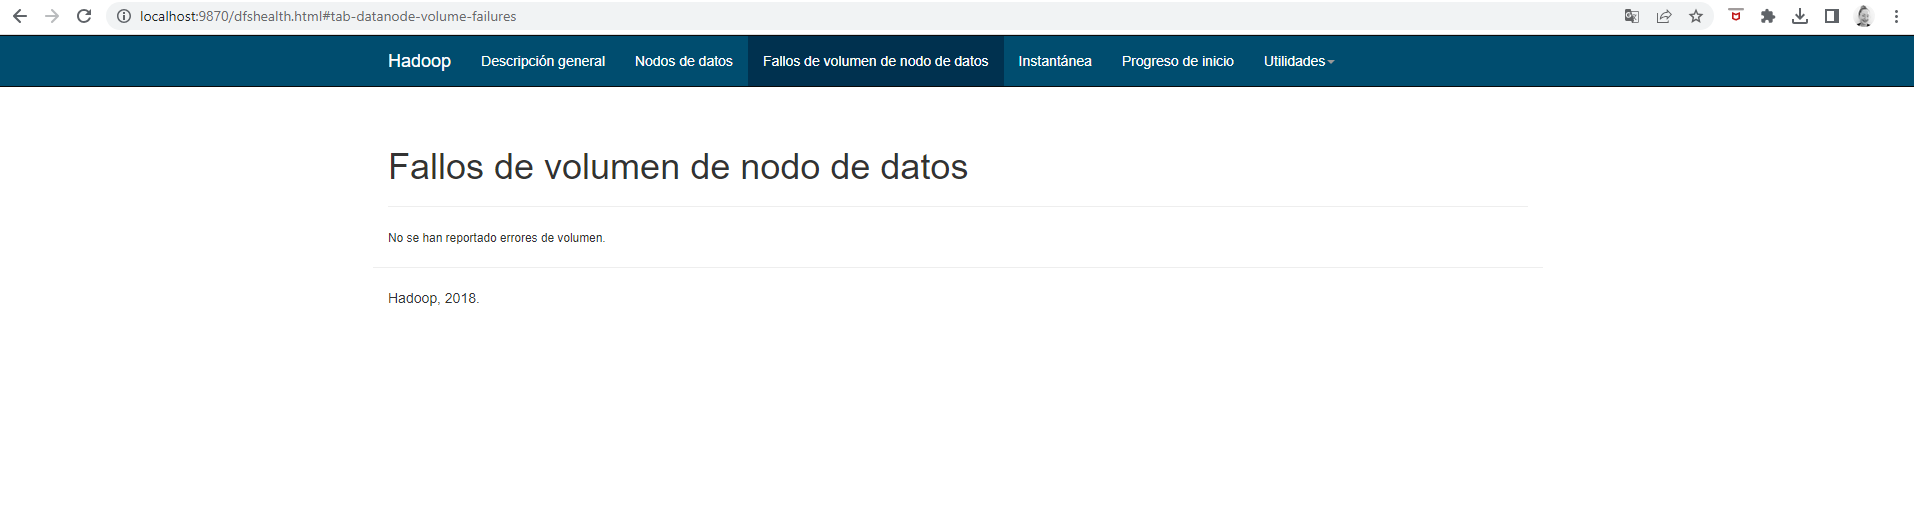

In [ ]:
Otra sección de progreso de incio.

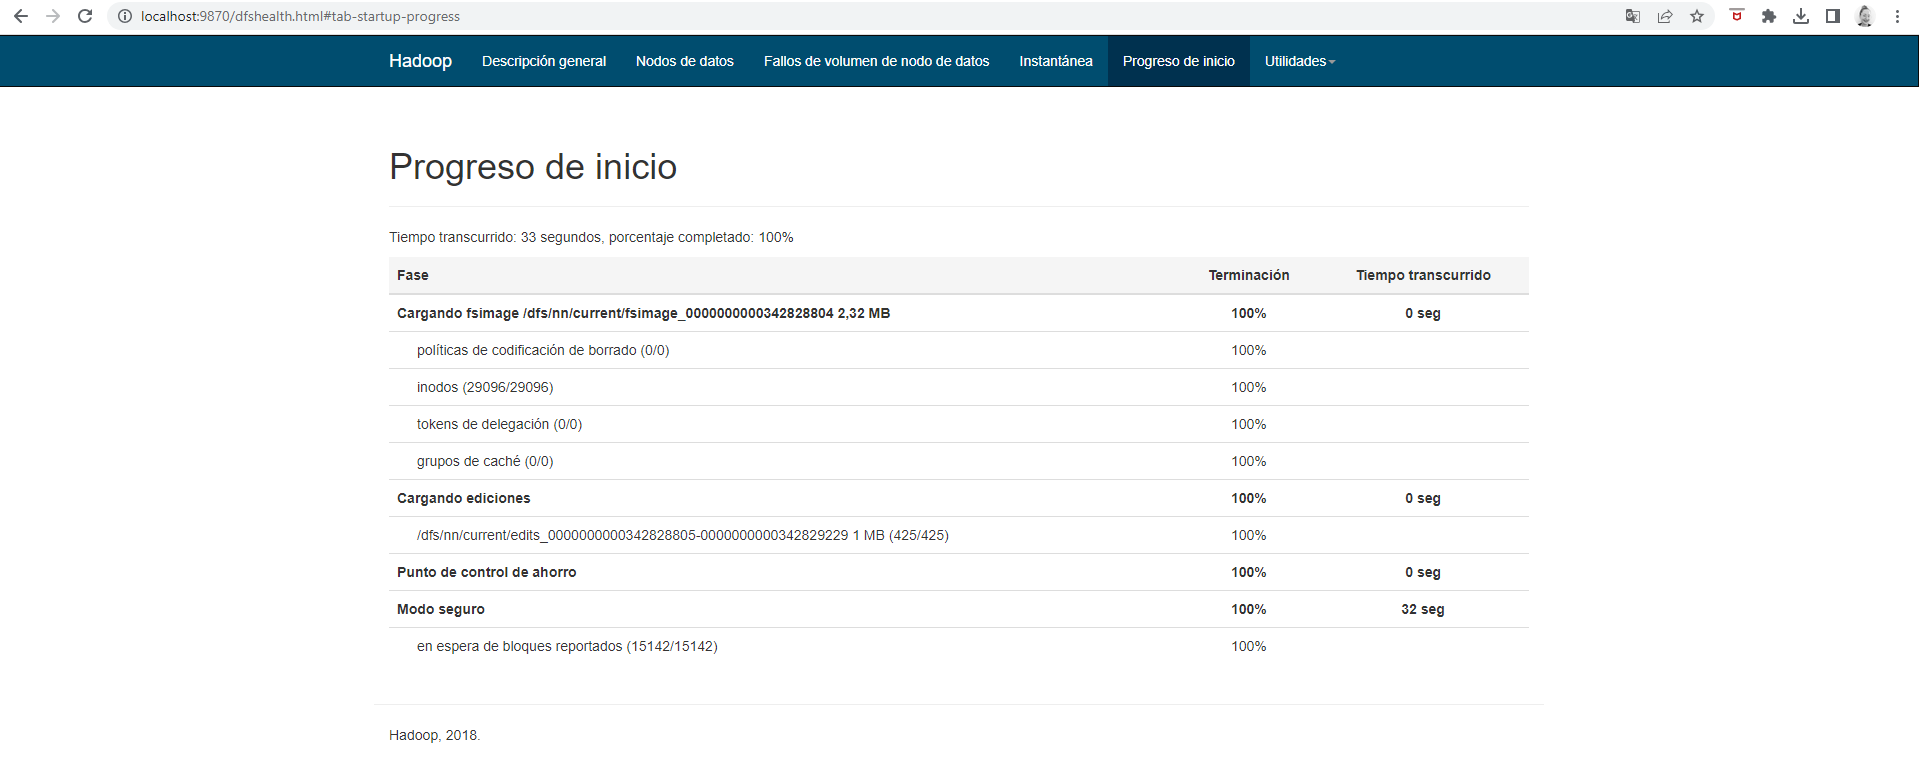

En la sección explorar directorio, podemos visualizar el nombre de los directorios, el tamaño del bloque, la replicación , el dueño de ese directorio y el tipo de permiso, read(r), write(w) o execute(x) que indica el permiso para acceder a un directorio hijo de un directorio padre determinado.

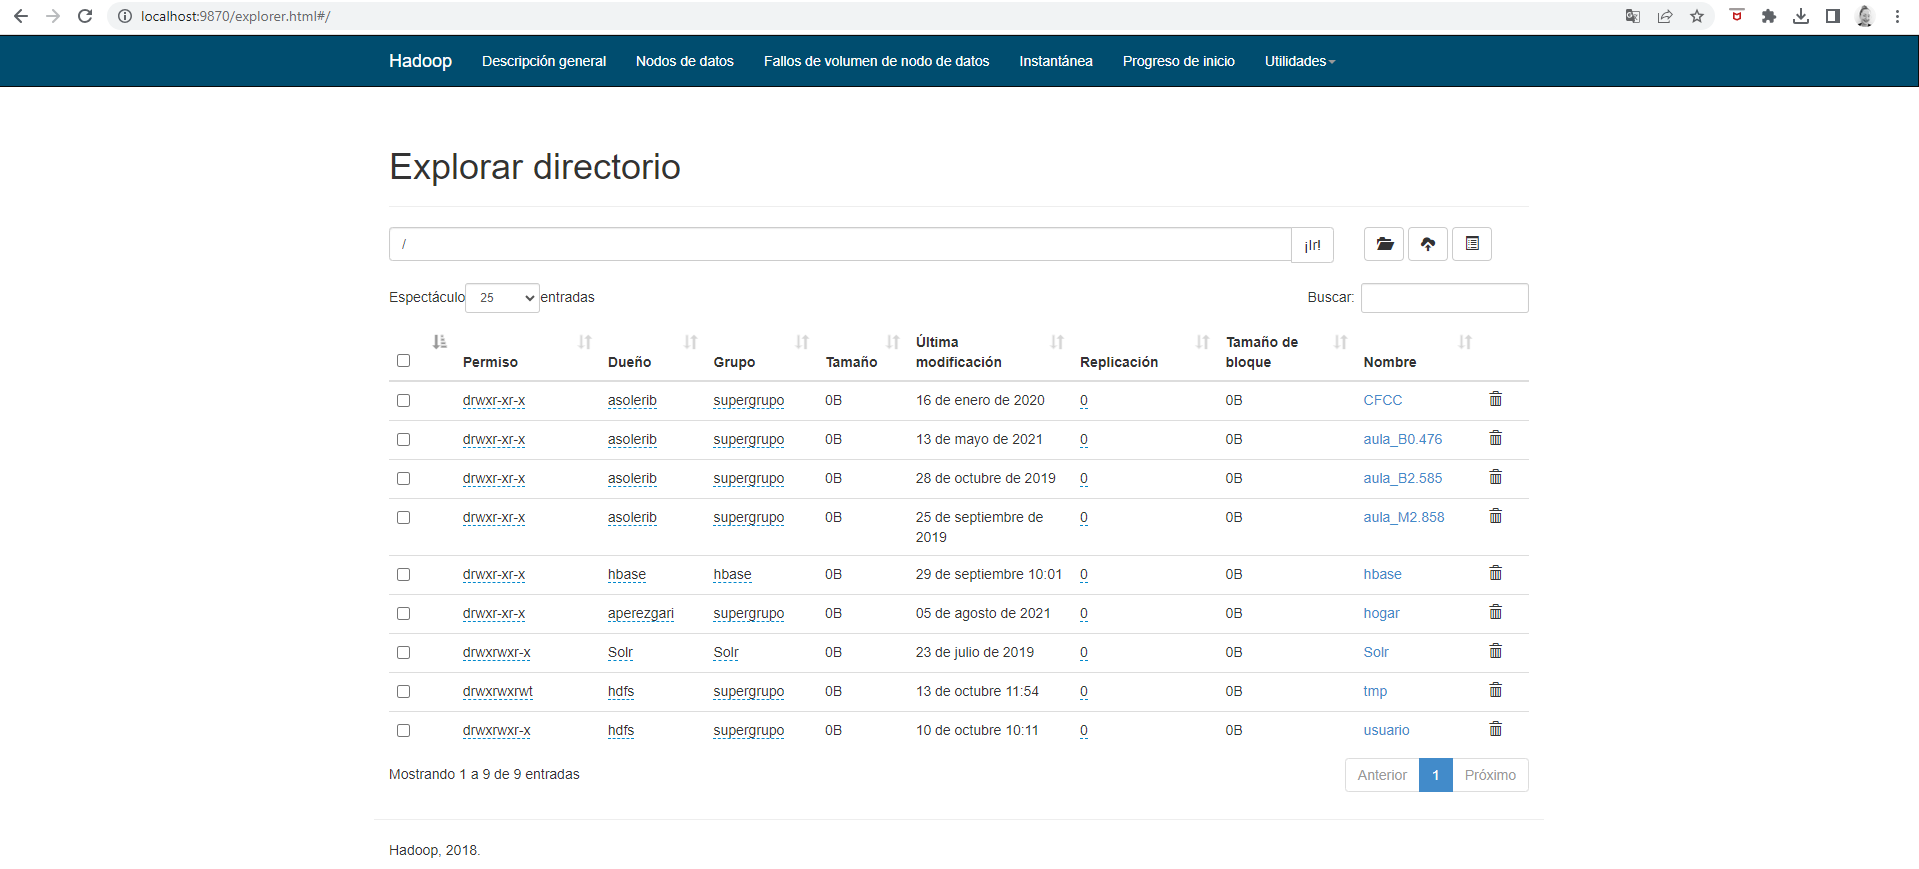